In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # data visualization
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [31]:
df=pd.read_csv(r"D:\R Excel Sessions\Assignments\Decision Trees\Company_Data.csv" )

In [4]:
df.head

<bound method NDFrame.head of      Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Educ

In [5]:
df.columns


Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


## Create Categories for Sales as 'Low' , 'Medium' and 'High'

In [8]:
df["sales_new"]=pd.cut(df.Sales,bins=[0,5,10,99],labels=['Low','Medium','High'])

df["sales_new"].value_counts()


Medium    245
High       78
Low        76
Name: sales_new, dtype: int64

Drop old column

In [9]:
df1=df.drop(columns=['Sales'],axis=1)
df1.columns


Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'sales_new'],
      dtype='object')

# #Check missing Values in the data

In [10]:
df1.isnull().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
sales_new      1
dtype: int64

### To check the rows with null values in Sales 

In [11]:
df2 = df[df.isna().any(axis=1)]
print (df2)

     Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
174    0.0        139      24            0         358    185    Medium   79   

     Education Urban  US sales_new  
174         15    No  No       NaN  


Drop row which has Missing Value

In [32]:
df3=df1.dropna(subset=['sales_new'])
df3.shape
df3.head
df3.isnull().sum()


CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
sales_new      0
dtype: int64

# Create table for missing data analysis

In [13]:
def draw_missing_data_table(df3):
    total = df3.isnull().sum().sort_values(ascending=False)
    percent = (df3.isnull().sum()/df3.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

draw_missing_data_table(df3)

,Total,Percent
sales_new,0,0.0
US,0,0.0
Urban,0,0.0
Education,0,0.0
Age,0,0.0
ShelveLoc,0,0.0
Price,0,0.0
Population,0,0.0
Advertising,0,0.0
Income,0,0.0


## Declare target variable and predictor variables

In [33]:
x=df3.drop(['sales_new'],axis=1)
y=df3['sales_new']

In [35]:
x
y

0      Medium
1        High
2        High
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398    Medium
399    Medium
Name: sales_new, Length: 399, dtype: category
Categories (3, object): [Low < Medium < High]

## Define categorical variables 

In [16]:
categorical = [col for col in x.columns if x[col].dtypes == 'O']

categorical

['ShelveLoc', 'Urban', 'US']

## Define Numerical variables

In [17]:
numerical = [col for col in x.columns if x[col].dtypes != 'O']

numerical

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education']

In [18]:
#s=x.drop(numerical, axis=1)

In [19]:
#q=x.drop(categorical,axis=1)

In [20]:
#from sklearn import preprocessing
#le=preprocessing.LabelEncoder()

In [21]:
#for column in categorical:
#    le.fit(s[column])
#    p=pd.DataFrame({column:le.transform(s[column]).tolist()})
#    q=q.join(p)
#    p.drop([column],axis=1)
    
#q


,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US
0,138,73,11,276,120,42,17,0.0,1.0,1.0
1,111,48,16,260,83,65,10,1.0,1.0,1.0
2,113,35,10,269,80,59,12,2.0,1.0,1.0
3,117,100,4,466,97,55,14,2.0,1.0,1.0
4,141,64,3,340,128,38,13,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,2.0,0.0,1.0
396,139,23,3,37,120,55,11,2.0,1.0,1.0
397,162,26,12,368,159,40,18,0.0,1.0,1.0
398,100,79,7,284,95,50,12,1.0,1.0,1.0


In [26]:
from sklearn import preprocessing
labelencoder=preprocessing.LabelEncoder()


In [36]:
x['ShelveLoc1'] = labelencoder.fit_transform(x['ShelveLoc'])

In [37]:
x['Urban1'] =labelencoder.fit_transform(x['Urban'])

In [38]:
x['US1']=labelencoder.fit_transform(x['US'])

In [43]:
x1=x.drop(columns=['ShelveLoc','Urban','US'],axis=1)

In [44]:
x1

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc1,Urban1,US1
0,138,73,11,276,120,42,17,0,1,1
1,111,48,16,260,83,65,10,1,1,1
2,113,35,10,269,80,59,12,2,1,1
3,117,100,4,466,97,55,14,2,1,1
4,141,64,3,340,128,38,13,0,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,1,1
396,139,23,3,37,120,55,11,2,0,1
397,162,26,12,368,159,40,18,2,1,1
398,100,79,7,284,95,50,12,0,1,1


# #Split data into training and test dataset

In [45]:
from sklearn.model_selection import train_test_split

x1_train,x1_test,y_train,y_test = train_test_split(x1,y,test_size=0.30,random_state=42)


In [47]:
x1_train
x1_train.shape
x1_test
x1_test.shape
y_train
y_train.shape
y_test

199    Medium
350    Medium
33     Medium
209       Low
93     Medium
        ...  
60     Medium
79     Medium
285    Medium
305    Medium
278    Medium
Name: sales_new, Length: 120, dtype: category
Categories (3, object): [Low < Medium < High]

## Decision Tree Classifier with criterion gini index

In [48]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [49]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


In [50]:
#fit the model
clf_gini.fit(x1_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [51]:
#Predict the Test set results with criterion gini index
y_pred_gini=clf_gini.predict(x1_test)

In [52]:
#Check accuracy score with criterion gini index

from sklearn.metrics import accuracy_score

In [53]:
print('Model accuracy score with gini index:{0:0.4f}'.format(accuracy_score(y_test,y_pred_gini)))


Model accuracy score with gini index:0.6917


####Compare Train and Test Accuracy for overfitting


In [55]:
####Compare Train and Test Accuracy for overfitting
y_pred_train_gini=clf_gini.predict(x1_train)

print('Training set accuracy score :{0:0.4f}'.format(accuracy_score(y_train,y_pred_train_gini)))


Training set accuracy score :0.6989


In [57]:
###Check for overfitting and Underfitting

###Print the scores on Training and test dataset

print('Training set score :{0:0.4f}'.format(clf_gini.score(x1_train,y_train)))
print('Test set score :{0:0.4f}'.format(clf_gini.score(x1_test,y_test)))


Training set score :0.6989
Test set score :0.6917


In [58]:
#Here, the training-set accuracy score is 0.6989 while the test-set accuracy to be 0.6917. These two values are quite comparable. So, there is no sign of overfitting.


[Text(334.8, 380.52, 'X[7] <= 0.5\ngini = 0.567\nsamples = 279\nvalue = [55, 59, 165]'),
 Text(167.4, 271.8, 'X[4] <= 106.5\ngini = 0.538\nsamples = 70\nvalue = [3, 31, 36]'),
 Text(83.7, 163.07999999999998, 'X[3] <= 36.5\ngini = 0.379\nsamples = 26\nvalue = [2, 4, 20]'),
 Text(41.85, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(125.55000000000001, 54.360000000000014, 'gini = 0.333\nsamples = 25\nvalue = [1, 4, 20]'),
 Text(251.10000000000002, 163.07999999999998, 'X[0] <= 129.5\ngini = 0.491\nsamples = 44\nvalue = [1, 27, 16]'),
 Text(209.25, 54.360000000000014, 'gini = 0.255\nsamples = 20\nvalue = [0, 17, 3]'),
 Text(292.95, 54.360000000000014, 'gini = 0.531\nsamples = 24\nvalue = [1, 10, 13]'),
 Text(502.20000000000005, 271.8, 'X[7] <= 1.5\ngini = 0.539\nsamples = 209\nvalue = [52, 28, 129]'),
 Text(418.5, 163.07999999999998, 'X[4] <= 110.5\ngini = 0.529\nsamples = 59\nvalue = [31, 2, 26]'),
 Text(376.65000000000003, 54.360000000000014, 'gini = 0.188\nsamp

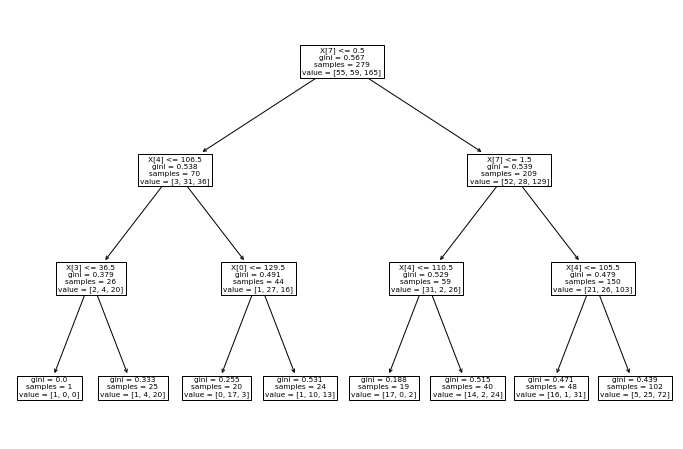

In [59]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(x1_train,y_train))


## Decision Tree Classifier with criterian Entrophy

In [60]:
#Ininitiate decision tree classifier model with criterian entrphy
 
clf_en=DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


In [61]:
##Fit the model
clf_en.fit(x1_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [62]:
#Predict the Test set results with criterion entropy
y_pred_en = clf_en.predict(x1_test)

In [63]:
#Check accuracy score with criterion entropy
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))


Model accuracy score with criterion entropy: 0.7000


In [64]:
#Compare Train test accuracy

y_pred_train_en=clf_en.predict(x1_train)
y_pred_train_en


array(['Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Medium',
       'Low', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'High', 'Low', 'Medium', 'Medium', 'Medium', 'High',
       'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Low',
       'Medium', 'Low', 'Medium', 'Low', 'Medium', 'High', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'High', 

In [65]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))


Training-set accuracy score: 0.6989


In [67]:
#Check for overfitting and underfitting
print('Training set score :{0:0.4f}'. format(clf_en.score(x1_train,y_train)))

print('Test set score :{0:0.4f}'. format(clf_en.score(x1_test,y_test)))


Training set score :0.6989
Test set score :0.7000


In [68]:
#We can see that the training-set score and test-set score is almost same as above. 

[Text(334.8, 380.52, 'X[7] <= 0.5\nentropy = 1.384\nsamples = 279\nvalue = [55, 59, 165]'),
 Text(167.4, 271.8, 'X[4] <= 106.5\nentropy = 1.209\nsamples = 70\nvalue = [3, 31, 36]'),
 Text(83.7, 163.07999999999998, 'X[0] <= 116.5\nentropy = 0.991\nsamples = 26\nvalue = [2, 4, 20]'),
 Text(41.85, 54.360000000000014, 'entropy = 0.89\nsamples = 13\nvalue = [0, 4, 9]'),
 Text(125.55000000000001, 54.360000000000014, 'entropy = 0.619\nsamples = 13\nvalue = [2, 0, 11]'),
 Text(251.10000000000002, 163.07999999999998, 'X[0] <= 144.0\nentropy = 1.087\nsamples = 44\nvalue = [1, 27, 16]'),
 Text(209.25, 54.360000000000014, 'entropy = 0.878\nsamples = 37\nvalue = [0, 26, 11]'),
 Text(292.95, 54.360000000000014, 'entropy = 1.149\nsamples = 7\nvalue = [1, 1, 5]'),
 Text(502.20000000000005, 271.8, 'X[7] <= 1.5\nentropy = 1.318\nsamples = 209\nvalue = [52, 28, 129]'),
 Text(418.5, 163.07999999999998, 'X[4] <= 110.5\nentropy = 1.174\nsamples = 59\nvalue = [31, 2, 26]'),
 Text(376.65000000000003, 54.36000

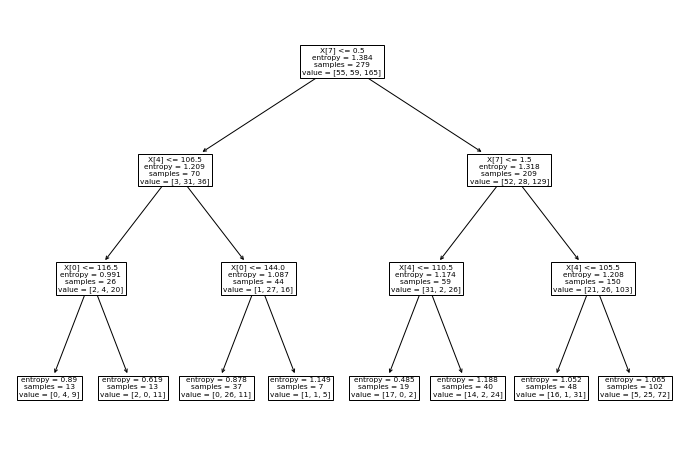

In [69]:
#Visualize decision-trees
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(x1_train, y_train)) 



In [70]:
####Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)


Confusion matrix

 [[ 8  0 15]
 [ 0  7 10]
 [ 3  8 69]]


In [71]:
####Classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

        High       0.73      0.35      0.47        23
         Low       0.47      0.41      0.44        17
      Medium       0.73      0.86      0.79        80

    accuracy                           0.70       120
   macro avg       0.64      0.54      0.57       120
weighted avg       0.69      0.70      0.68       120



## Check the model accuracy using XGBoost classifier

In [72]:
import xgboost as xgb

### Use grid search to find number of trees(n_estimators)


In [73]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


In [74]:
model = XGBClassifier()

In [75]:
n_estimators=range(10,100,10)

In [76]:
param_grid=dict(n_estimators=n_estimators)

In [77]:
grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [78]:
grid.fit(x1,y)

C:\Users\Smita Gavandi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': range(10, 100, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=Non

In [79]:
print(grid.best_score_)
print(grid.best_params_)


0.7017543859649122
{'n_estimators': 90}


In [80]:
###Best value for n_estimators is 90

### Use grid search to find Maximum Depth of trees(max_depth)

In [81]:
model = XGBClassifier()


In [82]:
max_depth=range(2,10,1)

In [83]:
param_grid = dict(max_depth=max_depth)

In [84]:
grid = GridSearchCV(estimator=model, param_grid=param_grid)


In [85]:
grid.fit(x1,y)
print(grid.best_score_)
print(grid.best_params_)


C:\Users\Smita Gavandi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.6992481203007519
{'max_depth': 3}


In [86]:
###Best value for max_depth is 3

In [87]:
###Build the model using n_estimators as 90 and max_depth as 3


In [88]:
xgb1 = XGBClassifier(objective ='reg:logistic', learning_rate = 0.1,
                max_depth = 3, n_estimators = 90)


In [89]:
xgb1.fit(x1,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=90, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [90]:
train_pred=xgb1.predict(x1_train)

In [91]:
import numpy as np
train_acc = np.mean(train_pred==y_train) 
print(train_acc)

0.96415770609319


In [92]:
test_pred=xgb1.predict(x1_test)

In [93]:
test_acc=np.mean(test_pred==y_test)
print(test_acc)

0.9833333333333333


In [95]:
###Using XGboost classifier , Training accuracy is 96% and Testing accuracy is 98%


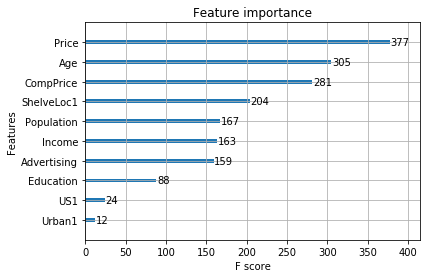

In [94]:
#Variable importance plot

from xgboost import plot_importance
plot_importance(xgb1)

## Adaboost Classifier

#The most important parameters are base_estimator, n_estimators, and learning_rate.

base_estimator is the learning algorithm to use to train the weak models. This will almost always not needed to be changed because by far the most common learner to use with AdaBoost is a decision tree – this parameter’s default argument.

n_estimators is the number of models to iteratively train.

learning_rate is the contribution of each model to the weights and defaults to 1. Reducing the learning rate will mean the weights will be increased or decreased to a small degree, forcing the model train slower (but sometimes resulting in better performance scores).

loss is exclusive to AdaBoostRegressor and sets the loss function to use when updating weights. This defaults to a linear loss function however can be changed to square or exponential.


In [96]:
from sklearn.ensemble import AdaBoostClassifier


In [97]:
model = AdaBoostClassifier(n_estimators=90, 
                           learning_rate=1,
                           random_state=40)


In [98]:
model.fit(x1_train,y_train)
train_pred=model.predict(x1_train)


In [99]:
import numpy as np
train_acc = np.mean(train_pred==y_train) 
print(train_acc)


0.7741935483870968


In [100]:
test_pred=model.predict(x1_test)
test_acc=np.mean(test_pred==y_test)
print(test_acc)


0.8166666666666667


In [101]:
###Using Adaboost classifier Training accuracy is 77% and Testing Accuracy is 81%

In [ ]:
###XGBoost classifier is teh best model since it gives the highest Training and Testing Accuracy